# TECH 2 mandatory assignment - Part B
Solution

First, I need to import my functions, as well as numpy

In [181]:
import numpy as np
from part_A import std_builtin, std_loops


Next, I need to read data from `data.csv` file. 
I start by creating 3 lists, `large`, `medium` and `small` and store respectively data in columns to the lists.
Where large is a 10 thousand large list.

In [182]:
import csv
large_list = []
medium_list = []
small_list = []

# Read the CSV file
with open('data.csv', mode='r') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        # Check and append non-empty values for each column
        if len(row) > 0 and row[0].strip():  # First column
            large_list.append(float(row[0].strip()))
        if len(row) > 1 and row[1].strip():  # Second column
            medium_list.append(float(row[1].strip()))
        if len(row) > 2 and row[2].strip():  # Third column
            small_list.append(float(row[2].strip()))

Afterwards I would calculate standard deviation using numpy, builtin functions and loops on the lists I created above.
I wouls store the results in a matrix, where functions would correspond to rows, and list sizes would be columns. 
So each element of my matrix  

 $a_{ij} = f_i(\text{list}_j)$


In [183]:
functions = [np.std, std_builtin, std_loops]
function_names = ['Numpy std', 'Builtin std', 'Loops std' ]
data_samples = {'small': small_list,
        'medium': medium_list,
        'large': large_list}

std_result_matrix = {size: [func(data) for func in functions] for size, data in data_samples.items()}


I will proceed in a like manner to calculate the running times of each element of my matrix above, 
and I would store the results in a matrix as well. 
Functions would be rows and list sizes would be columns 
and each element would be runtime of a function on a specific list  

$t_{ij} = t_{fi}(\text{list}_j)$


In [184]:
import timeit
time_result_matrix = {
    size: [timeit.timeit(lambda: func(data), number=100) for func in functions] for size, data in data_samples.items()
}

I wish to see the result matrix, so I would create a function to display elements in the matrix in a table.

In [185]:
def print_matrix_pretty(matrix, header):
    print(header)
    print('-'* len(header))

    for i, func_name in enumerate(function_names):
        row = f'{func_name:<15}'
        for size in data_samples.keys():
            tij = round(matrix[size][i],7)
            row += f'{tij:<15}'
        print(row)    

In [186]:
header = f"{'FUNCTION':<15} {'SMALL':<15} {'MEDIUM':<15} {'LARGE':<15}"

Here I would show standard deviation calculated in a table.

In [187]:
print_matrix_pretty(std_result_matrix, header=header)

FUNCTION        SMALL           MEDIUM          LARGE          
---------------------------------------------------------------
Numpy std      0.2854045      0.2846744      0.2823721      
Builtin std    0.2854045      0.2846744      0.2823721      
Loops std      0.2854045      0.2846744      0.2823721      


Showing running times of different functions on different data sized lists as a table.    
In the table it is already possible to see which functions performs better on different sized lists.


In [188]:
print_matrix_pretty(time_result_matrix, header)

FUNCTION        SMALL           MEDIUM          LARGE          
---------------------------------------------------------------
Numpy std      0.1988597      0.0244397      0.0047541      
Builtin std    0.6684931      0.0626464      0.0039982      
Loops std      0.9027413      0.0510944      0.0060247      


In [189]:
import pandas as pd
df = pd.DataFrame(time_result_matrix, index=function_names)

df.style \
  .format(precision=7, thousands=",", decimal=".") \
  .format_index(str.upper, axis=1) \
  .relabel_index(function_names, axis=0)

,SMALL,MEDIUM,LARGE
Numpy std,0.1988597,0.0244397,0.0047541
Builtin std,0.6684931,0.0626464,0.0039982
Loops std,0.9027413,0.0510944,0.0060247


I am going to make reading the results more comfortable.

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

In [191]:
data_frame = pd.DataFrame(time_result_matrix, index=function_names)

df = data_frame.reset_index().melt(id_vars='index', var_name='Size', value_name='Time')
df.rename(columns={'index': 'Function'}, inplace=True)

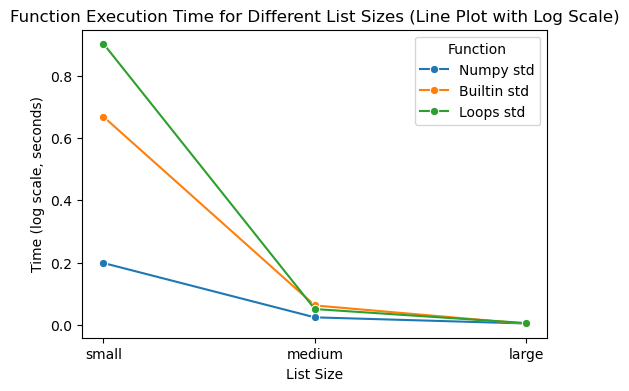

In [192]:
plt.figure(figsize=(6, 4))
ax = sns.lineplot(x='Size', y='Time', hue='Function', data=df, marker='o')

#plt.yscale('log')  # might be interesting to see from logarithmic perspective, as numbers are very far away from each other

plt.xlabel('List Size')
plt.ylabel('Execution Time')
plt.title('Graph of execution times for different functions for different sized lists')
plt.show()

This is some level of improvement. Yet at points of medium and especially large list size the results kind of bland together. I  am going to provide heatmap, to have better insight into running times.

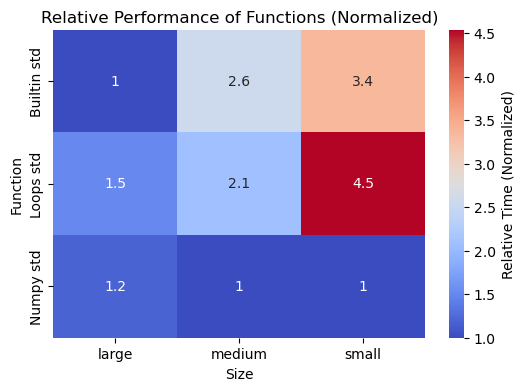

In [193]:
df_pivot = df.pivot(index='Function', columns='Size', values='Time')
normalized_df = df_pivot / df_pivot.min()

plt.figure(figsize=(6, 4))
sns.heatmap(normalized_df, annot=True, cmap='coolwarm', cbar_kws={'label': 'Relative Time (Normalized)'})
plt.title('Relative Performance of Functions (Normalized)')
plt.show()

Runtimes using `%timeit`. I get more precise results, yet somewhat difficult to read.

In [194]:
%timeit np.std(large_list)
%timeit np.std(medium_list)
%timeit np.std(small_list)

109 μs ± 51.6 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
169 μs ± 53.8 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
803 μs ± 21.7 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [195]:
%timeit std_loops(large_list)
%timeit std_loops(medium_list)
%timeit std_loops(small_list)

49.2 μs ± 1.69 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
497 μs ± 13.3 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
7.66 ms ± 2.83 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [196]:
%timeit std_builtin(large_list)
%timeit std_builtin(medium_list)
%timeit std_builtin(small_list)

66.8 μs ± 13.8 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
545 μs ± 89.5 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
4.67 ms ± 351 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
